## PARTICLE SWARM OPTIMIZATION

### Criando os valores iniciais

In [20]:
import numpy as np
import random

lb = np.array([-1,-1,-1])
ub = np.array([2,2,2])


def fun_checkpositions(vec_pos,var_no_group,lb,ub):
      Lb = lb
      Ub = ub
      for i in range(var_no_group):
        is_below_lb = vec_pos[i] < Lb;
        is_above_ub = vec_pos[i] > Ub;
        vec_pos[i][is_below_lb] = Lb[is_below_lb]
        vec_pos[i][is_above_ub] = Ub[is_above_ub]
      return vec_pos


def Fun(u):
    z = (1-u[0])**2 + 100*(u[1] - u[0]**2)**2 + 100*(u[2] - u[1]**2)**2 
    return z

N = 10  # numero de particulas
d = np.size(lb)
k = 0
kmax = 1000 # numero maximo de iteracoes

c1 = 2 # constante cognitiva
c2 = 2 # constante social

## Inicializacao das particulas e velocidades
x = np.zeros([N,d])
v = np.zeros([N,d])
Evolution = np.zeros((1,kmax))


for i in range(N):
    for j in range(d):
        x[i][j] = random.random()*(ub[j]-lb[j])+lb[j]

print(x)
## Calculando as particulas iniciais na funcao objetivo
fx = np.zeros([N,1])
for i in range(N):
    xi = x[i]
    fx[i] = Fun(xi)

fx

[[-0.91280868  0.32885209 -0.1236832 ]
 [ 1.18763982 -0.33039118  0.04996955]
 [ 0.88639592 -0.32021936  0.9992103 ]
 [ 1.97502424  0.71840068  0.60813022]
 [ 1.26816015  0.03501864  0.32081855]
 [ 0.7806263   0.60099776  0.82530489]
 [-0.48873293  1.94108863  0.48010514]
 [-0.2437123   0.83255145  0.60549947]
 [-0.02227901 -0.68153686  1.5018705 ]
 [-0.86828061 -0.37959069  1.77128969]]


array([[  34.4718763 ],
       [ 303.45169256],
       [ 202.7198493 ],
       [1014.51374282],
       [ 257.78527735],
       [  21.59463877],
       [1372.88484504],
       [  62.09192307],
       [ 155.17729917],
       [ 396.75130923]])

In [21]:
## salvando a melhor particula global e a melhor localizacao das particulas
gfit = np.min(fx)     # menor valor global
ind = np.argmin(fx)   # indice do menor valor global
g = x[ind]            # vetor de posicao do menor valor global 
fp  = fx              # melhor valor por posicao
p = x                 # melhor posicao
print(p)
fp


[[-0.91280868  0.32885209 -0.1236832 ]
 [ 1.18763982 -0.33039118  0.04996955]
 [ 0.88639592 -0.32021936  0.9992103 ]
 [ 1.97502424  0.71840068  0.60813022]
 [ 1.26816015  0.03501864  0.32081855]
 [ 0.7806263   0.60099776  0.82530489]
 [-0.48873293  1.94108863  0.48010514]
 [-0.2437123   0.83255145  0.60549947]
 [-0.02227901 -0.68153686  1.5018705 ]
 [-0.86828061 -0.37959069  1.77128969]]


array([[  34.4718763 ],
       [ 303.45169256],
       [ 202.7198493 ],
       [1014.51374282],
       [ 257.78527735],
       [  21.59463877],
       [1372.88484504],
       [  62.09192307],
       [ 155.17729917],
       [ 396.75130923]])

In [22]:
## Iniciando o processo iterativo
for k in range(kmax):
    #k = k + 1
    ## Calculando as novas velocidades para cada particula
    for i in range(N):
        ## Extraindo as particulas
        xi = x[i]
        ## Extraindo a particula local
        pi = p[i]
        ## Determinando a nova velocidade para cada particula vi
        v[i] = v[i] + c1*np.random.rand(1,d)@(pi-xi) + c2*np.random.rand(1,d)@(g-xi)
    
    ## Determinacao de nova posicao de cada particula
    x = x+v
    x = fun_checkpositions(x,N,lb,ub)
    ## Determinando as novas particulas com a funcao objetivo
    for i in range(N):
        xi = x[i]
        fx[i] = Fun(xi)
    
    ## Salvando a melhor particula e a melhor posicao da particula
    gfitkplus1 = np.min(fx)
    ind = np.argmin(fx)
    if gfitkplus1 < gfit:
        gfit = gfitkplus1
        g = x[ind]
    
    for i in range(N):
        # Se alguma particula for melhor que a da solucao anterior, atualizar a melhor posicao local
        if fx[i] < fp[i]:
            fp[i] = fx[i]
            p[i] = x[i]

    Evolution[0][k] = gfit
    Xbest = g
    Fbest = gfit

Xbest

array([0.99938735, 0.99938735, 0.99938735])

### Funcao Completa

In [25]:
import numpy as np
import random

def fun_checkpositions(vec_pos,var_no_group,lb,ub):
      Lb = lb
      Ub = ub
      for i in range(var_no_group):
        is_below_lb = vec_pos[i] < Lb;
        is_above_ub = vec_pos[i] > Ub;
        vec_pos[i][is_below_lb] = Lb[is_below_lb]
        vec_pos[i][is_above_ub] = Ub[is_above_ub]
      return vec_pos

def myPSO(Fun,N,c1,c2,lb,ub,kmax):
    d = np.size(lb)
    k = 0
    ## Inicializacao das particulas e velocidades
    x = np.zeros([N,d])
    v = np.zeros([N,d])
    Evolution = np.zeros((1,kmax))

    for i in range(N):
        for j in range(d):
            x[i][j] = random.random()*(ub[j]-lb[j])+lb[j]

    ## Calculando as particulas iniciais na funcao objetivo
    fx = np.zeros([N,1])
    for i in range(N):
        xi = x[i]
        fx[i] = Fun(xi)

    ## salvando a melhor particula global e a melhor localizacao das particulas
    gfit = np.min(fx)     # menor valor global
    ind = np.argmin(fx)   # indice do menor valor global
    g = x[ind]            # vetor de posicao do menor valor global 
    fp  = fx              # melhor valor por posicao
    p = x                 # melhor posicao

    ## Iniciando o processo iterativo
    for k in range(kmax):
        #k = k + 1
        ## Calculando as novas velocidades para cada particula
        for i in range(N):
            ## Extraindo as particulas
            xi = x[i]
            ## Extraindo a particula local
            pi = p[i]
            ## Determinando a nova velocidade para cada particula vi
            v[i] = v[i] + c1*np.random.rand(1,d)@(pi-xi) + c2*np.random.rand(1,d)@(g-xi)
        
        ## Determinacao de nova posicao de cada particula
        x = x+v
        x = fun_checkpositions(x,N,lb,ub)
        ## Determinando as novas particulas com a funcao objetivo
        for i in range(N):
            xi = x[i]
            fx[i] = Fun(xi)
        
        ## Salvando a melhor particula e a melhor posicao da particula
        gfitkplus1 = np.min(fx)
        ind = np.argmin(fx)
        if gfitkplus1 < gfit:
            gfit = gfitkplus1
            g = x[ind]
        
        for i in range(N):
            # Se alguma particula for melhor que a da solucao anterior, atualizar a melhor posicao local
            if fx[i] < fp[i]:
                fp[i] = fx[i]
                p[i] = x[i]

        Evolution[0][k] = gfit
        Xbest = g
        Fbest = gfit
    return Xbest, Fbest, Evolution


### Resolucao de Problemas

Ponto Otimo: [0.99803906 0.99803906]
Solucao Otima 0.0003868690673866875


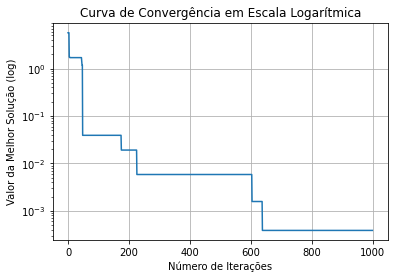

In [27]:
import matplotlib.pyplot as plt

lb = np.array([-5,-5])
ub = np.array([10,10])

def Fun(x):
  z = 100*(x[1]-x[0]**2)**2 + (x[0]-1)**2
  return z

N = 10  # numero de particulas
N_max = 1000 # numero maximo de iteracoes
c1 = 2 # constante cognitiva
c2 = 2 # constante social

best,fmin,conv_curve = myPSO(Fun,N,c1,c2,lb,ub,N_max)
print(f"Ponto Otimo: {best}")
print(f"Solucao Otima {fmin}")

plt.semilogy(range(N_max), conv_curve[0])
plt.xlabel('Número de Iterações')
plt.ylabel('Valor da Melhor Solução (log)')
plt.title('Curva de Convergência em Escala Logarítmica')
plt.grid(True)
plt.show()

Ponto Otimo: [0.99839899 0.99839899 0.99839899]
Solucao Otima 0.0005135695815253985


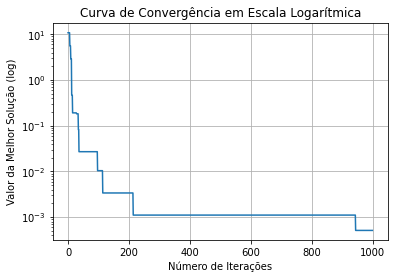

In [30]:
import matplotlib.pyplot as plt
def Fun(u):
    z = (1-u[0])**2 + 100*(u[1] - u[0]**2)**2 + 100*(u[2] - u[1]**2)**2 
    return z

N = 10  # numero de particulas
N_max = 1000 # numero maximo de iteracoes
c1 = 2 # constante cognitiva
c2 = 2 # constante social
lb = np.array([-1,-1,-1])
ub = np.array([2,2,2])

best,fmin,conv_curve = myPSO(Fun,N,c1,c2,lb,ub,N_max)

print(f"Ponto Otimo: {best}")
print(f"Solucao Otima {fmin}")

plt.semilogy(range(N_max), conv_curve[0])
plt.xlabel('Número de Iterações')
plt.ylabel('Valor da Melhor Solução (log)')
plt.title('Curva de Convergência em Escala Logarítmica')
plt.grid(True)
plt.show()


Ponto Otimo: [0.63757379]
Solucao Otima -0.33290965152139285


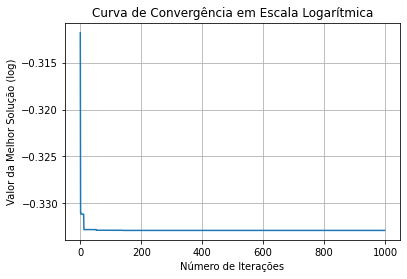

In [29]:
import sys
sys.path.append('C:/Users/paulo/Documents/Mestrado/Projeto/Codes/problemas_selecionados')
import problema3 as p3
import matplotlib.pyplot as plt

fobj = p3.func
lb,ub = p3.constraint()

N = 10  # numero de particulas
N_max = 1000 # numero maximo de iteracoes
c1 = 2 # constante cognitiva
c2 = 2 # constante social

best,fmin,conv_curve = myPSO(fobj,N,c1,c2,lb,ub,N_max)
print(f"Ponto Otimo: {best}")
print(f"Solucao Otima {fmin}")

plt.plot(range(N_max), conv_curve[0])
plt.xlabel('Número de Iterações')
plt.ylabel('Valor da Melhor Solução (log)')
plt.title('Curva de Convergência em Escala Logarítmica')
plt.grid(True)
plt.show()